<a href="https://colab.research.google.com/github/cs20m016/cs6910-Assignment-1/blob/main/CE_vs_SE%5B8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
from random import randint
from random import random
from random import seed
import math
from sklearn.utils import shuffle
from keras.datasets import fashion_mnist
train_data,test_data=fashion_mnist.load_data()

In [24]:
train_data_mean = np.mean(train_data[0])
train_data_stdev = np.std(train_data[0])
train_data = ((train_data[0] - train_data_mean) / train_data_stdev, train_data[1])
test_data = ((test_data[0] - train_data_mean) / train_data_stdev, test_data[1])
train_X, trainY = train_data
test_X, testY = test_data

In [25]:
train_X, trainY = shuffle(train_X, trainY)
test_X, testY = shuffle(test_X, testY)

In [26]:
print('Train: X=%s, y=%s' %(train_X.shape,trainY.shape))
print('Test: X=%s, y=%s' %(test_X.shape,testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [27]:
class_label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
trainX=[train_X[i].flatten() for i in range(len(train_X))]
testX=[test_X[i].flatten() for i in range(len(test_X))]

train_samples=len(trainX)
test_samples=len(testX)
xlen=len(trainX[0])
print(xlen)

784


In [28]:
def initialize_weights(n_input, n_hidden_layer, n_output,neurons_hl):
    W = list()
    W.append([[np.random.normal() for j in range(n_input)]for i in range(neurons_hl)])
    for i in range(n_hidden_layer-1):
        W.append([[np.random.normal() for j in range(neurons_hl)]for i in range(neurons_hl)])
    W.append([[np.random.normal() for j in range(neurons_hl)]for i in range(n_output)])
    return W

In [29]:
def initialize_bias(n_input, n_hidden_layer, n_output,neurons_hl):
    B=list()
    for i in range(n_hidden_layer):
        B.append([np.random.normal() for i in range(neurons_hl)])
    B.append([np.random.normal() for i in range(n_output)])
    return B

In [30]:
def sigmoid(b):
  a=np.array(b,dtype=np.float128)
  h=list()
  for el in a:
    h.append(1/(1+np.exp(-el)))
  return h

In [31]:
def softmax(b):
  a=np.array(b,dtype=np.float128)
  h=list()
  sum=0
  for el in a:
    sum+=np.exp(el)
  for el in a:
    h.append(np.exp(el)/sum)
  return h

In [32]:
def feed_forward(input,W,B,L):
    H=list()
    A=list()
    H.append(input)
    A.append([0])
    h=input
    for i in range(1,L):
        a=B[i-1]+np.matmul(W[i-1],H[i-1])
        A.append(a)
        h=sigmoid(a)
        H.append(h)
    a=B[L-1]+np.matmul(W[L-1],H[L-1])
    A.append(a)
    hL=softmax(a)
    H.append(hL)
    return H,A,hL

In [33]:
def cmp(e):
  g=1/(1+np.exp(-e))
  return g*(1-g)

In [34]:
def diff_sigmoid(a):
    res=list()
    for el in a:
      res.append(cmp(el))
    return res

In [35]:
def back_propogation_ce(H,A,y_hat,label,W):
    W_grad=list()
    B_grad=list()
    one_hot_y=np.zeros(K)
    one_hot_y[label]+=1
    ak_grad = y_hat-one_hot_y
    for k in range(L,0,-1):
        w_grad=np.matmul(np.matrix(ak_grad).T,np.matrix(H[k-1]))
        W_grad.append(w_grad)
        B_grad.append(ak_grad)
        if k != 1:
            h_grad=np.matmul(np.transpose(W[k-1]),ak_grad)
            ak_grad=np.multiply(h_grad,diff_sigmoid(A[k-1]))
    return W_grad,B_grad

In [44]:
def back_propogation_mse(H,A,y_hat,label,W):
    W_grad=list()
    B_grad=list()
    ak_grad=list()
    for i in range(K):
        value=0
        for k in range (K):
            if k!=i:
              value += y_hat[k]*y_hat[k]*y_hat[i]
            else:
              value += y_hat[i]*y_hat[i]*(1-y_hat[i])
        if i==label:
            value += y_hat[label]*(y_hat[label]-1)
        else:
            value += y_hat[label]*y_hat[label]
        ak_grad.append(2*value)
    for k in range(L,0,-1):
        w_grad=np.matmul(np.matrix(ak_grad).T,np.matrix(H[k-1]))
        W_grad.append(w_grad)
        B_grad.append(ak_grad)
        if k != 1:
            h_grad=np.matmul(np.transpose(W[k-1]),ak_grad)
            ak_grad=np.multiply(h_grad,diff_sigmoid(A[k-1]))
    return W_grad,B_grad

In [42]:
def gradient_descent(str):
    t=0
    max_iterations=15
    error=0.0
    W= initialize_weights(xlen,L-1,K,N)
    B= initialize_bias(xlen,L-1,K,N)
    loss=list()
    while (t<max_iterations):
        wgrad=list()
        bgrad=list()
        for l in range(L):
            wgrad.append(np.zeros(shape=np.shape(W[l])).tolist())
            bgrad.append(np.zeros(shape=np.shape(B[l])).tolist())
        for i in range(train_samples):
            H,A,y_hat=feed_forward(trainX[i],W,B,L)
            if str=='cross':
                error += (-math.log(y_hat[trainY[i]]))
            else:
                tmp=0
                for k in range (K):
                  if k==trainY[i]:
                    tmp+= (1-y_hat[k])*(1-y_hat[k])
                  else:
                    tmp+= y_hat[k]*y_hat[k]
                error += tmp                                  
            if str=='cross':
                W_grad,B_grad=back_propogation_ce(H,A,y_hat,trainY[i],W)
            else:
                W_grad,B_grad=back_propogation_mse(H,A,y_hat,trainY[i],W)
            W_grad=W_grad[::-1]
            B_grad=B_grad[::-1]
            for l in range(L):
                wgrad[l]=np.add(wgrad[l],W_grad[l]).tolist()
                bgrad[l]=np.add(bgrad[l],B_grad[l]).tolist()
        for l in range(L):
            W[l]=(np.matrix(W[l])-np.multiply(eta,wgrad[l])).tolist()
            B[l]=np.subtract(B[l],np.multiply(eta,bgrad[l])).tolist()       
        loss.append(error/train_samples)
        error=0.0
        t=t+1
        print('Epoch',t)
    return W,B,loss

In [40]:
#No of classes
K=10
#No of Layers
L=3
#size of each hidden layer
N=8
#learning rate
eta=0.0001

In [ ]:
Wc,Bc,loss_ce=gradient_descent('cross')

In [ ]:
Wm,Bm,loss_mse=gradient_descent('mse')

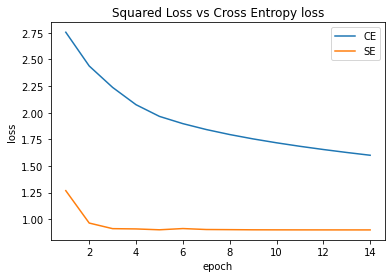

In [66]:
xc=np.arange(1,len(loss_ce))
yc=loss_ce[1:]
xm=np.arange(1,len(loss_mse))
ym=loss_mse[1:]
plt.plot(xc, yc,label='CE')
plt.plot(xm, ym,label='SE')
plt.title('Squared Loss vs Cross Entropy loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()